In [1]:
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np
from clearn.utils.utils import get_latent_vector_column
from clearn.config.common_path import get_encoded_csv_file
from clearn.config import ExperimentConfig
from clearn.experiments.experiment import Experiment
%matplotlib inline

/home/sunilv/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sunilv/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sunilv/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sunilv/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [2]:
run_id = 1
ROOT_PATH = "/Users/sunilkumar/concept_learning/image_classification_5epoch/"
config1 = ExperimentConfig(ROOT_PATH, 4, 10, [64, 128, 32])
config2 = ExperimentConfig(ROOT_PATH, 4, 5, [64, 128, 32])
exp_config = config1
exp = Experiment(1, "VAE_MNIST", 128, exp_config, run_id)
exp_config.create_directories(run_id)
N_3 = exp_config.num_units[exp_config.num_decoder_layer - 2]
N_2 = exp_config.num_units[exp_config.num_decoder_layer - 3]
Z_DIM = exp_config.Z_DIM

TypeError: __init__() missing 1 required positional argument: 'num_cluster_config'

In [11]:
def get_mean(i,df,mean_col_names):
    df_0 = df[df["label"] == i]
    mu_0 = df_0[mean_col_names].values
    mu_0 = mu_0.mean(axis=0)
    return mu_0

In [12]:
def plot_latent_vector(df, labels):
    figure = plt.figure(figsize=(20,10))
    for label in labels:
        mu_mean = get_mean(label, df,mean_col_names)
        plt.plot(mu_mean,label=str(label))
    plt.legend(loc='upper left', shadow=True, fontsize='x-large')
    plt.xticks(xticks)
    plt.grid(which="major",axis="both")
    plt.title(title)


In [13]:
def plot_latent_vector_runs(run_ids, labels, mean_col_names):
    for label in labels:
        figure = plt.figure(figsize=(20, 10))
        for run_id in run_ids:
            # Read the encoding for this run
            exp = Experiment(1, "VAE_MNIST", 128, exp_config, run_id)
            exp_config.create_directories(run_id)
            filename  = get_encoded_csv_file(N_2, N_3, Z_DIM, "val")
            df = pd.read_csv(os.path.join(exp_config.ANALYSIS_PATH, filename))
            mu_mean = get_mean(label, df, mean_col_names)
            plt.plot(mu_mean, label=str(run_id))
        plt.legend(loc='upper left', shadow=True, fontsize='x-large')
        plt.xticks(xticks)
        plt.grid(which="major",axis="both")
        plt.title(title)


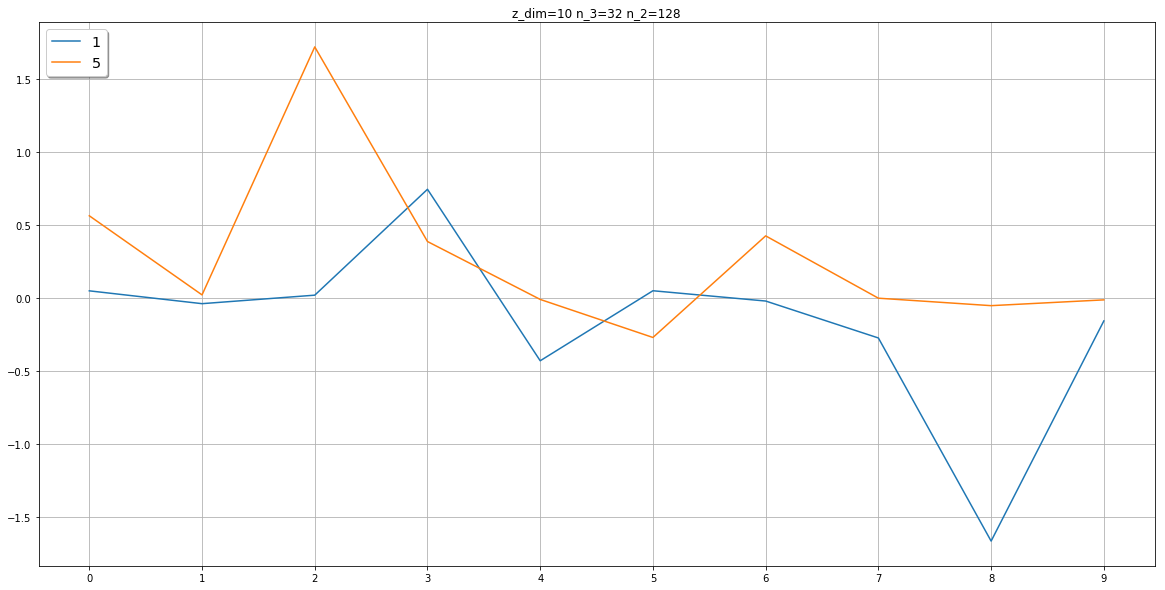

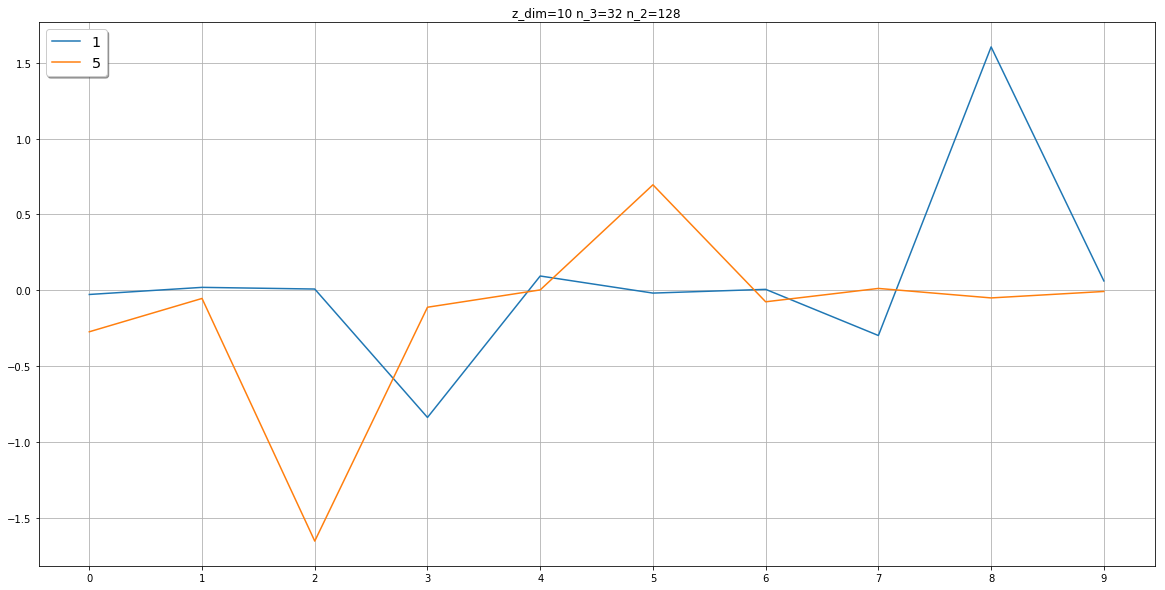

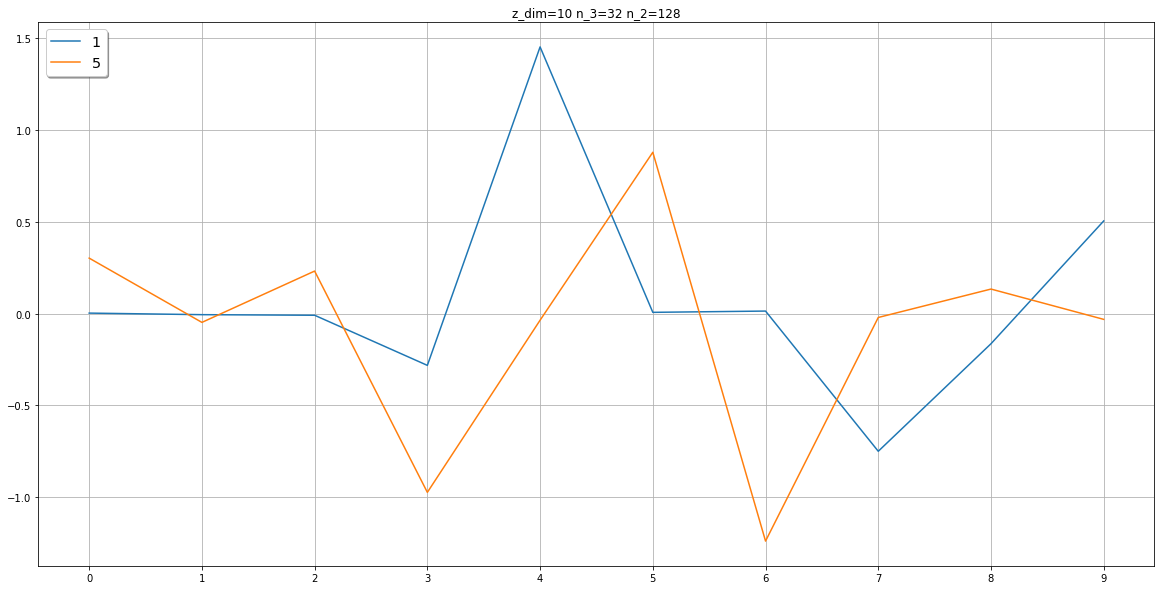

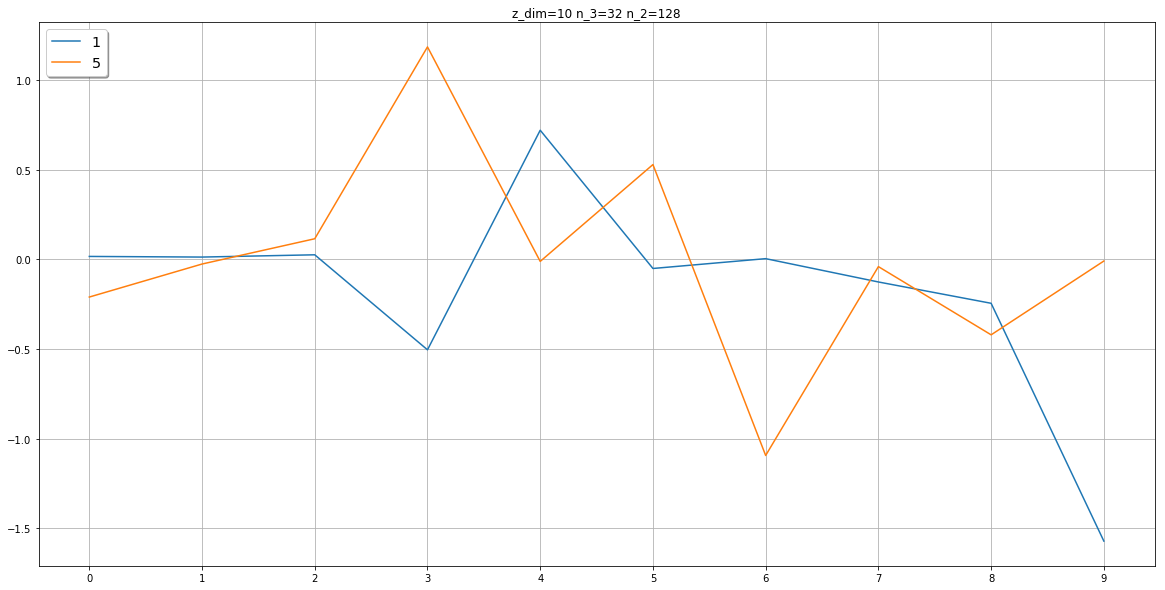

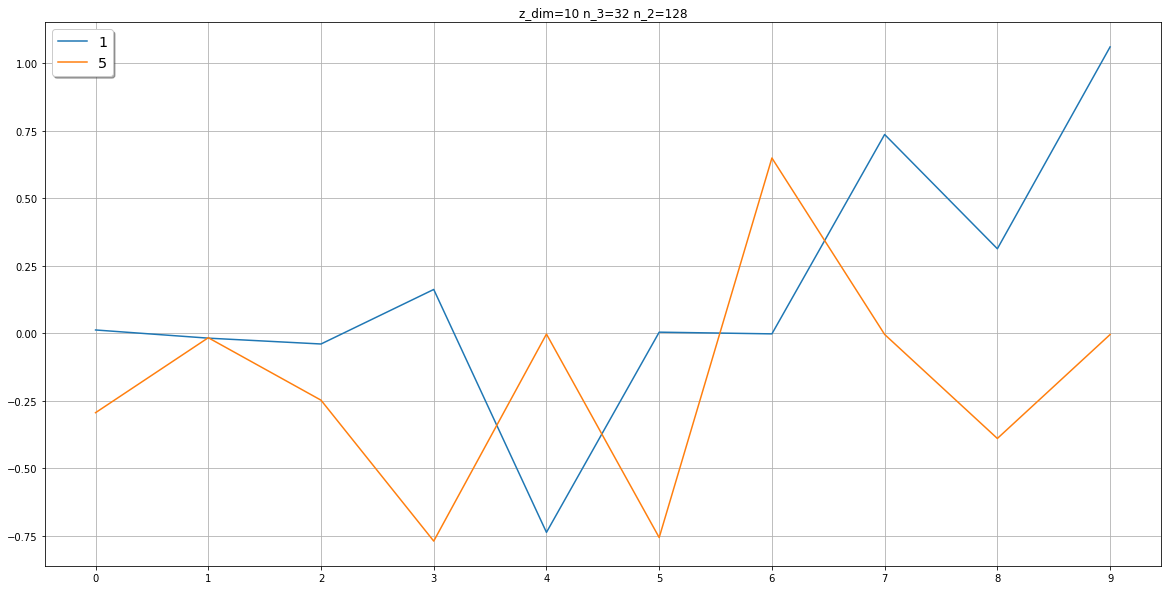

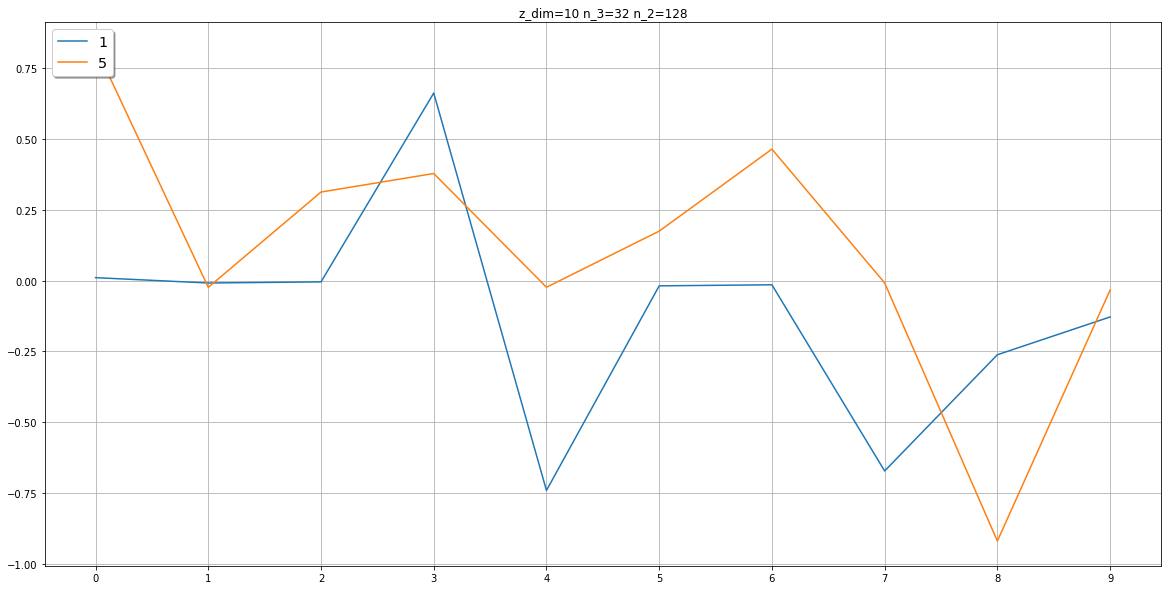

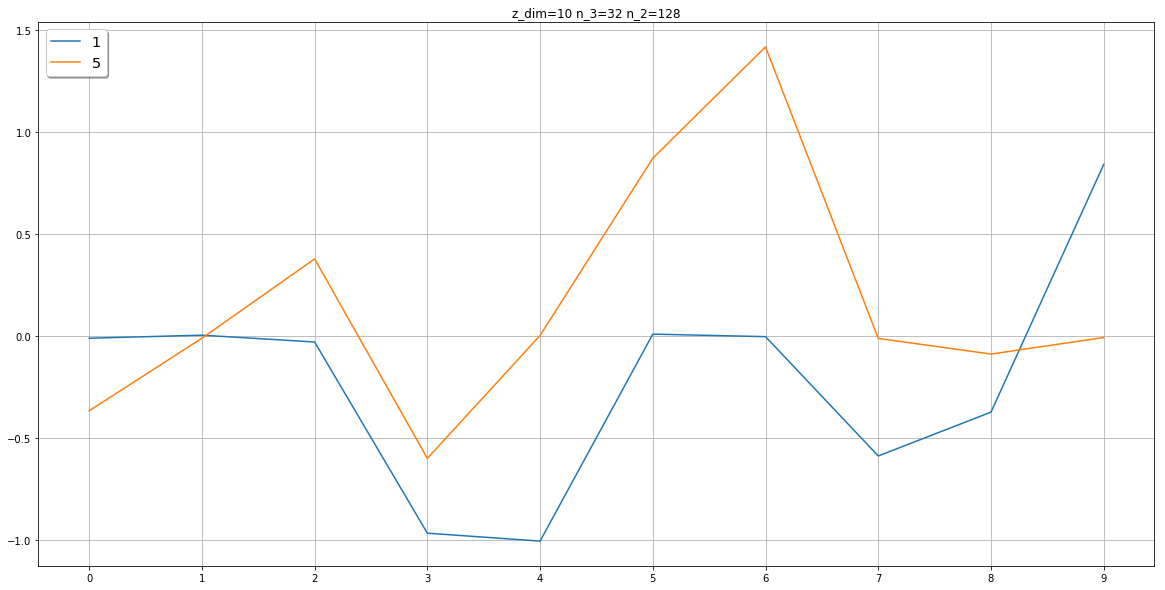

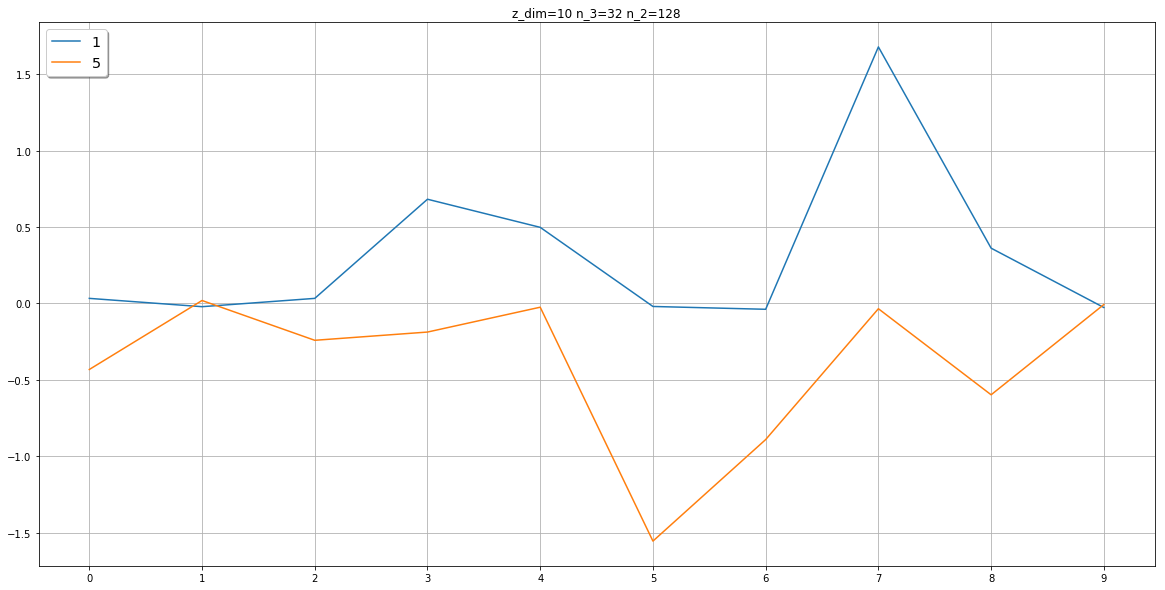

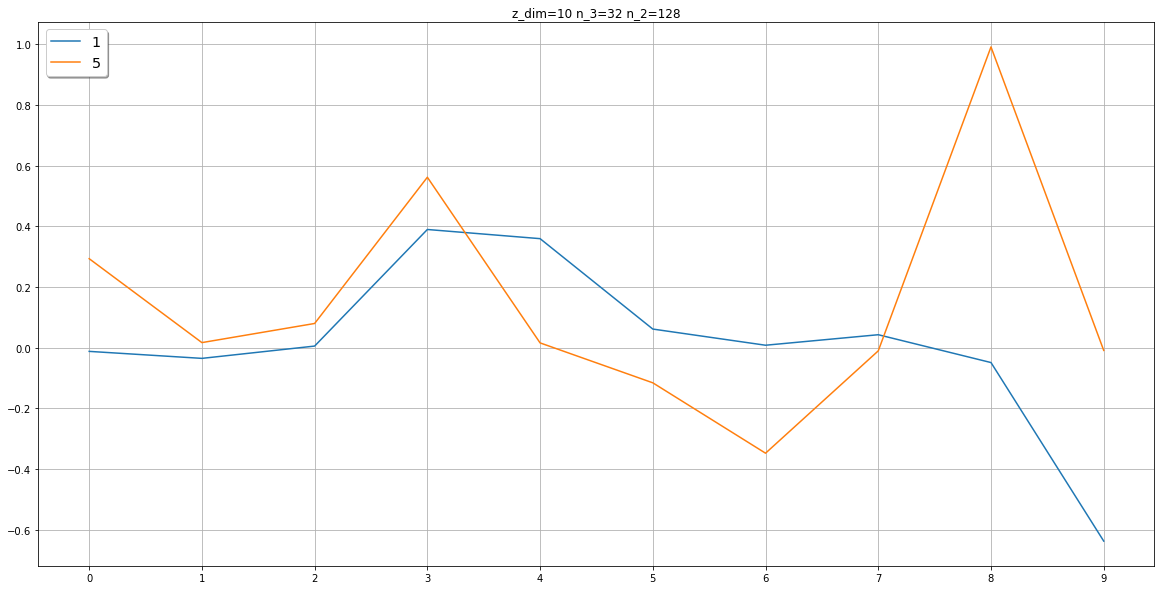

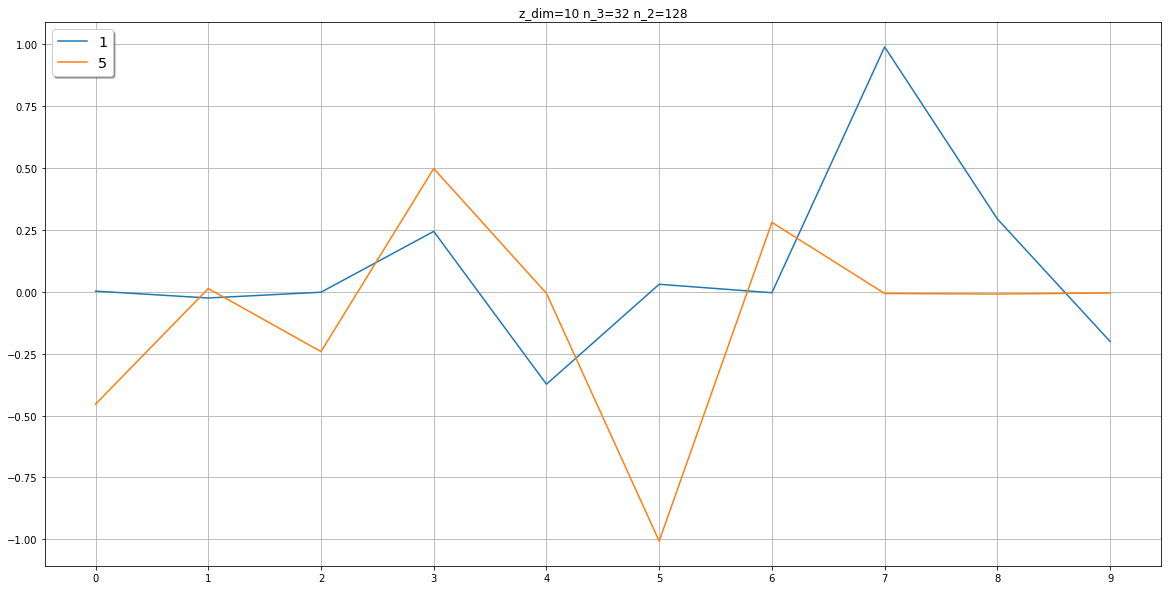

In [14]:
run_ids = [1,2,3,4,5]
run_ids = [1,5]
mean_col_names, sigma_col_names, z_col_names = get_latent_vector_column(exp_config.Z_DIM)
xticks = np.arange(0,Z_DIM,1)
title = "z_dim={} n_3={} n_2={}".format(Z_DIM, N_3, N_2)
plot_latent_vector_runs(run_ids, list(range(10)), mean_col_names)

    

In [15]:

filename  = get_encoded_csv_file(N_2, N_3, exp_config.Z_DIM, "val")
df = pd.read_csv(os.path.join(exp_config.ANALYSIS_PATH, filename))


# Plot latent vector for zero

In [16]:
mean_col_names, sigma_col_names, z_col_names = get_latent_vector_column(exp_config.Z_DIM)
xticks = np.arange(0,Z_DIM,1)
title = "z_dim={} n_3={} n_2={}".format(Z_DIM, N_3, N_2)

Text(0.5,1,'z_dim=10 n_3=32 n_2=128')

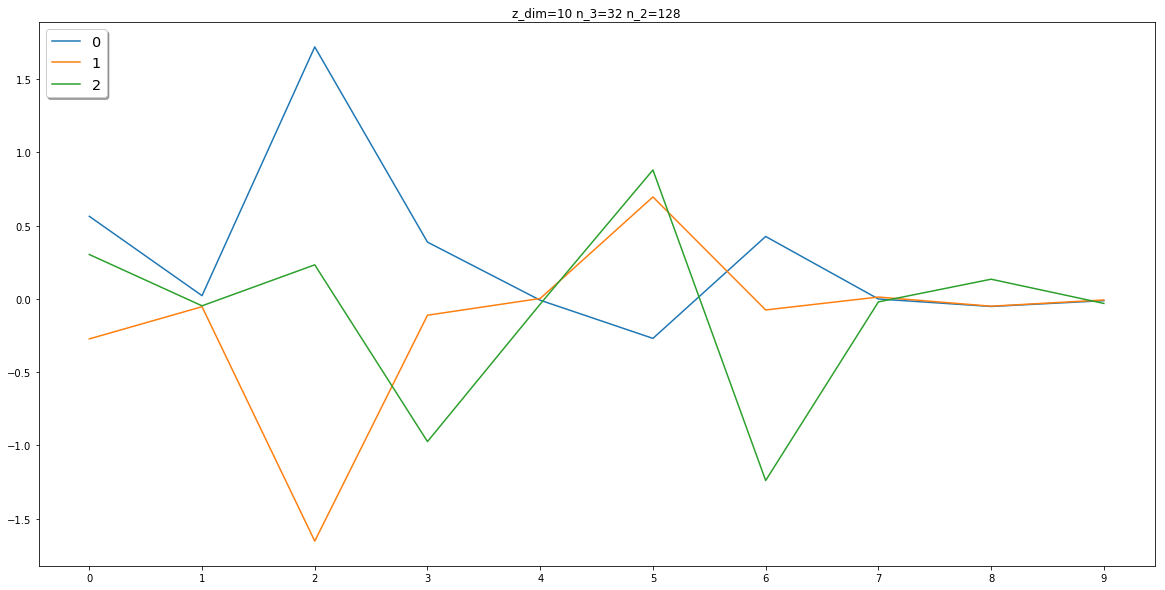

In [19]:
figure = plt.figure(figsize=(20,10))
for i in [0,1,2]:
    mu_mean = get_mean(i,df,mean_col_names)
    plt.plot(mu_mean,label=str(i))
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xticks(xticks)
plt.title(title)

Text(0.5,1,'z_dim=10 n_3=32 n_2=128')

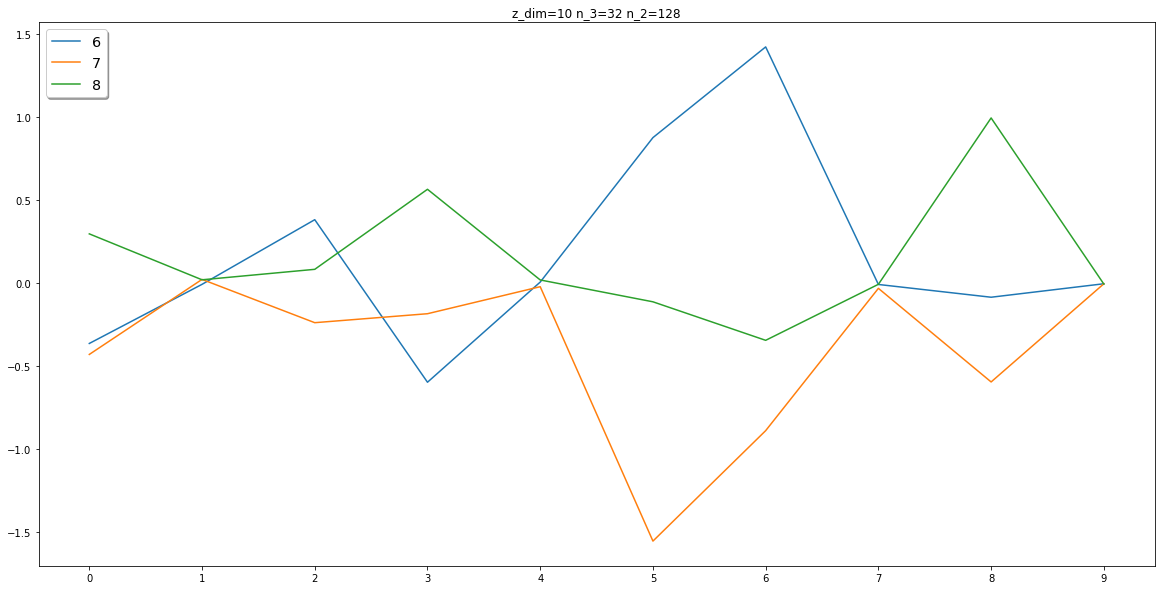

In [18]:
figure = plt.figure(figsize=(20,10))
for i in [6, 7, 8]:
    mu_mean = get_mean(i,df,mean_col_names)
    plt.plot(mu_mean,label=str(i))
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xticks(xticks)
plt.title(title) 

Text(0.5,1,'z_di  =5 n_3=32 n_2=128')

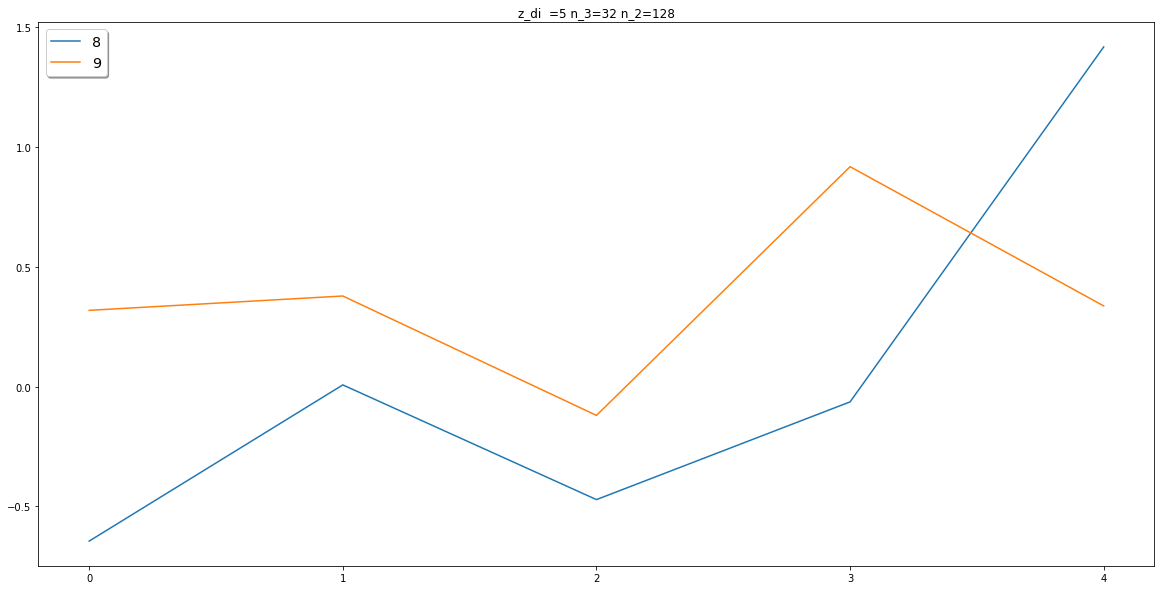

In [16]:
figure = plt.figure(figsize=(20,10))
for i in [8,9]:
    mu_mean = get_mean(i,df,mean_col_names)
    plt.plot(mu_mean,label=str(i))
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xticks(xticks)
plt.title(title)   